In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import env
import wrangle
import scipy.stats
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(123)

### Acquire Data

In [2]:
df = wrangle.wrangle_zillow()

Acquiring data from SQL database


In [3]:
df.head(2)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,yearbuilt,location
52440,3,2.0,1762,6317,522000,1955,LA
52439,3,1.0,1032,876,49546,1954,LA


### Split Data: train, validate, test

In [4]:
train, validate, test = wrangle.split_zillow_data(df)

In [5]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxamount,taxvaluedollarcnt,yearbuilt,location
442,4,2.0,1792,6733,585000,1956,Orange
45878,2,1.5,1712,925,82288,1968,Ventura
45857,3,2.0,1422,1023,79348,1955,LA
11954,3,2.0,1044,2628,202526,1958,LA
28541,3,1.0,1464,5397,459000,1952,LA


Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.



In [6]:
def plot_variable_pairs():
    

IndentationError: expected an indented block (1647174739.py, line 2)

Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [ ]:
def plot_categorical_and_continuous_vars():
    

Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.



### Exploratory Questions: 
- Why do some properties have a much higher value than others when they are located so close to each other? 
- Why are some properties valued so differently from others when they have nearly the same physical attributes but only differ in location? 
- Which has a greater influence on home value: number of bathrooms or number of bedrooms?

### Question 1: Why do some properties have a much higher value than others when they are located so close to each other?

In [69]:
train_Ventura = train[train.location == 'Ventura']

In [68]:
train_LA = train[train.location == 'LA']

In [67]:
train_Orange = train[train.location == 'Orange']

### Ventura Homes

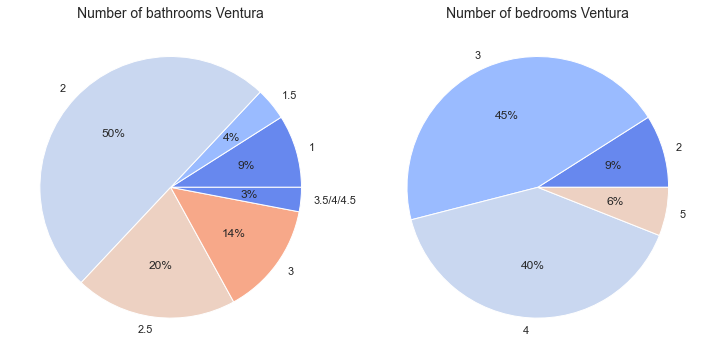

In [134]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

#define data
data1 = [9, 4, 50, 20, 14, 3]
labels1 = ['1', '1.5', '2', '2.5', '3', '3.5/4/4.5']
colors = sns.color_palette('coolwarm')[0:5]

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Number of bathrooms Ventura', fontdict = {'fontsize' : 14})

data2 = [9, 45, 40, 6]
labels2 = [2, 3, 4, 5]

ax2.pie(data2, labels = labels2, colors = colors, autopct='%.0f%%')
ax2.set_title("Number of bedrooms Ventura", fontdict = {'fontsize' : 14})
plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})


Key Takeaways: 
- Only subsets with significant percentages are highlighted below
- Homes sold in Ventura in 2017: 50% had 2 bathrooms, 20% had 2.5 bathrooms, 14% had 3 bathrooms. 
- Homes sold in Ventura in 2017: 45% had 3 bedrooms, 40% had 4 bedrooms, 9% had 2 bedrooms.

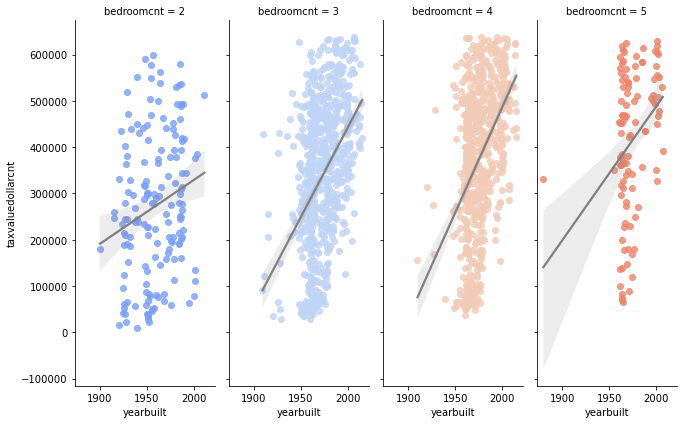

In [78]:
a = sns.lmplot(x="yearbuilt", y="taxvaluedollarcnt", hue="bedroomcnt", col="bedroomcnt",
               data=train_Ventura, line_kws={'color': 'grey'}, palette='coolwarm', height=6, aspect=.4, x_jitter=.1)
plt.tight_layout()

Key takeaways: 
- Because 85% of the homes sold in Ventura had 3 or 4 bedrooms, we can assume a strong positive linear relationship between year built and home tax value.
- While still having a slight positive linear relationship, the build year has less influence on 2 bedroom home values

In [102]:
mode_bathrooms_Ventura = train_Ventura.bathroomcnt.isin([1, 1.5, 2, 2.5, 3])
mo_bath_V = train_Ventura[mode_bathrooms_Ventura]

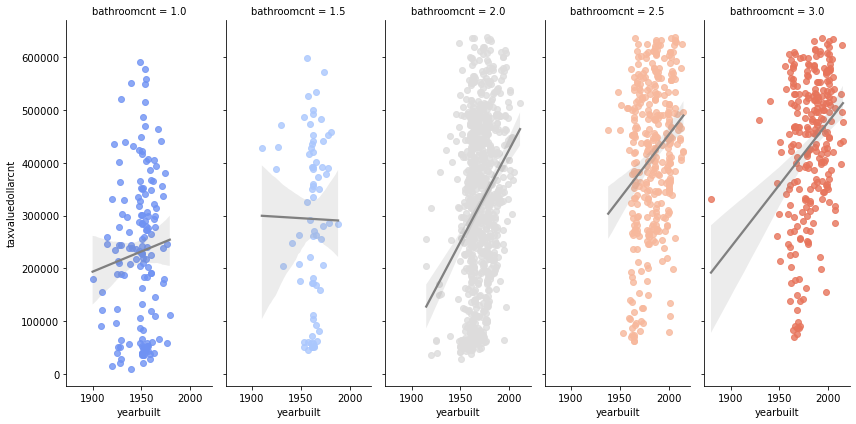

In [103]:

a = sns.lmplot(x="yearbuilt", y="taxvaluedollarcnt", hue="bathroomcnt", col="bathroomcnt",
               data=mo_bath_V, line_kws={'color': 'grey'}, palette='coolwarm', height=6, aspect=.4, x_jitter=.1)
plt.tight_layout()

Key takeaways: 
- Because 84% of the homes sold in Ventura had 2, 2.5, or 3 bathrooms, we can assume a strong positive linear relationship between year built and home tax value.
- 9% of homes had one bathroom: homes in this subset show a slight positive linear relationship
- 4% of homes had 1.5 bathrooms: homes in this subset show a slight negative linear relationship

Text(0.5, 1.0, 'How does square feet affect property tax value in Ventura?')

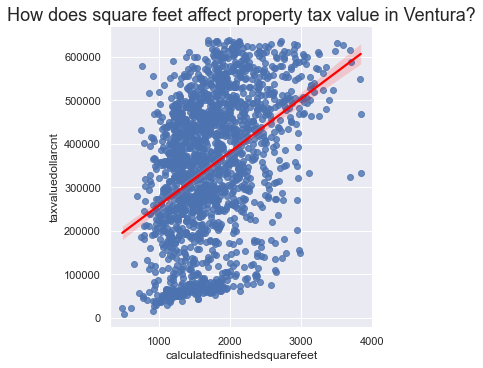

In [149]:
a = sns.lmplot(x="calculatedfinishedsquarefeet", y="taxvaluedollarcnt",
               data=train_Ventura, line_kws={'color': 'red'}, palette = 'coolwarm')
plt.title('How does square feet affect property tax value in Ventura?', fontdict = {'fontsize' : 18})

### Irrespective of bedroom count or bathroom count, on average,  as square feet increases  property value increases

Key takeaway: 
- As square feet increases, property value increases

### Orange County Homes

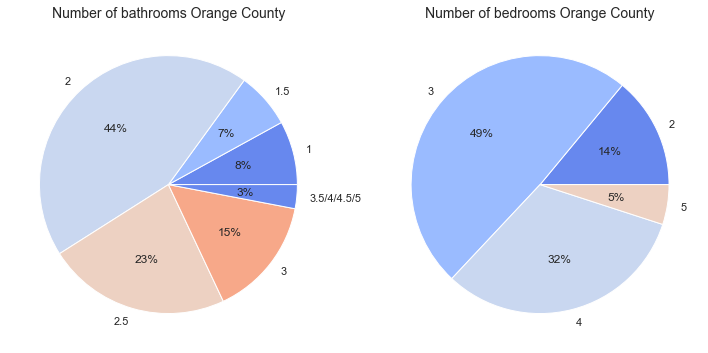

In [137]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

#define data
data1 = [8, 7, 44, 23, 15, 3]
labels1 = ['1', '1.5', '2', '2.5', '3', '3.5/4/4.5/5']
colors = sns.color_palette('coolwarm')[0:5]

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Number of bathrooms Orange County', fontdict = {'fontsize' : 14})

data2 = [14, 49, 32, 5]
labels2 = [2, 3, 4, 5]

ax2.pie(data2, labels = labels2, colors = colors, autopct='%.0f%%')
ax2.set_title("Number of bedrooms Orange County", fontdict = {'fontsize' : 14})
plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

Key Takeaways: 
- For the purpose of analysis I only highlight the majority percentages in each chart
- For homes sold in Orange County in 2017: 44% had 2 bathrooms, 23% had 2.5 bathrooms, and 15% had 3 bathrooms. 
- For homes sold in Orange County in 2017: 49% had 3 bedrooms, 32% had 4 bedrooms, and 14% had 2 bedrooms.

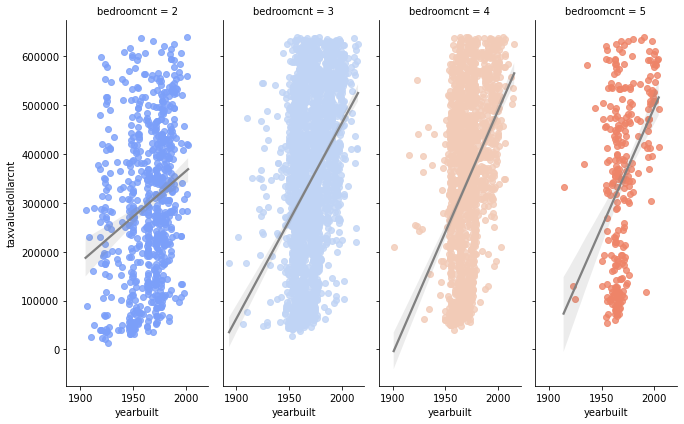

In [86]:
m = sns.lmplot(x="yearbuilt", y="taxvaluedollarcnt", hue="bedroomcnt", col="bedroomcnt",
               data=train_Orange, line_kws={'color': 'grey'}, palette='coolwarm', height=6, aspect=.4, x_jitter=.1)

Key Takeaways: 
- As build year increases, home value increases irrespective of bedroom count 
- 86 % of Orange county homes (3/4/5 bedroom) have a strong positive linear relationship.
- 14% of Orange county homes (2 bedroom) have a slight positive linear relationship.

In [110]:
mode_bathrooms_Orange = train_Orange.bathroomcnt.isin([1, 1.5, 2, 2.5, 3])
mo_bath_O = train_Orange[mode_bathrooms_Orange]

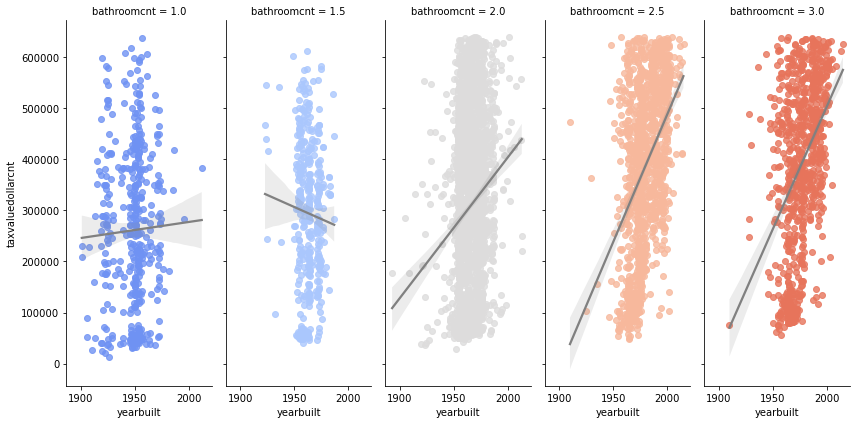

In [112]:
p = sns.lmplot(x="yearbuilt", y="taxvaluedollarcnt", hue="bathroomcnt", col="bathroomcnt",
               data=mo_bath_O, line_kws={'color': 'grey'}, palette='coolwarm', height=6, aspect=.4, x_jitter=.1)

Key takeaways: 
- 82% of homes (2/2.5/3 bathrooms) have a moderate to strong positive linear relationship
- 7% of homes (1.5 bathrooms) have a moderate negative linear relationship 
- 8% of homes (1 bathroom) have a weak positive linear relationship

Text(0.5, 1.0, 'How does square feet affect property tax value in Orange County?')

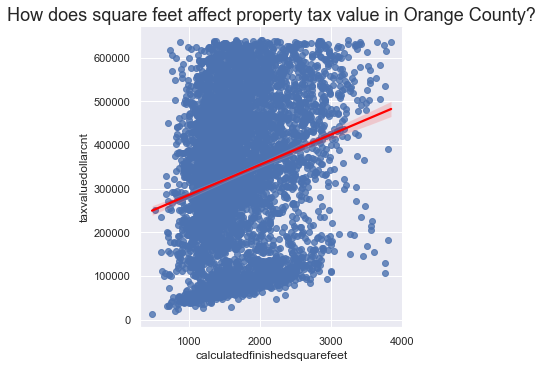

In [148]:
a = sns.lmplot(x="calculatedfinishedsquarefeet", y="taxvaluedollarcnt",
               data=train_Orange, line_kws={'color': 'red'}, palette = 'coolwarm')
plt.title('How does square feet affect property tax value in Orange County?', fontdict = {'fontsize' : 18})

### Irrespective of bedroom count or bathroom count, on average,  as square feet increases  property value increases

### LA Homes

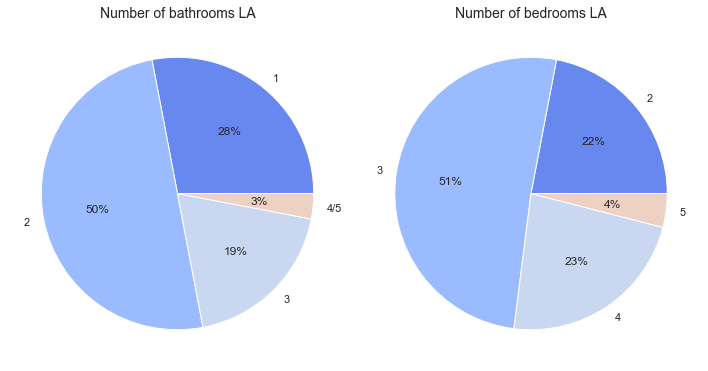

In [140]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

#define data
data1 = [28, 50, 19, 3]
labels1 = ['1', '2', '3', '4/5']
colors = sns.color_palette('coolwarm')[0:5]

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Number of bathrooms LA', fontdict = {'fontsize' : 14})

data2 = [22, 51, 23, 4]
labels2 = [2, 3, 4, 5]

ax2.pie(data2, labels = labels2, colors = colors, autopct='%.0f%%')
ax2.set_title("Number of bedrooms LA",  fontdict = {'fontsize' : 14})
plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

Key Takeaways: 
- For the purpose of analysis I only highlight the majority percentages in each chart
- For homes sold in LA County in 2017: 50% had 2 bathrooms, 28% had 1 bathrooms, and 19% had 3 bathrooms. 
- For homes sold in Orange County in 2017: 51% had 3 bedrooms, 23% had 4 bedrooms, and 22% had 2 bedrooms.

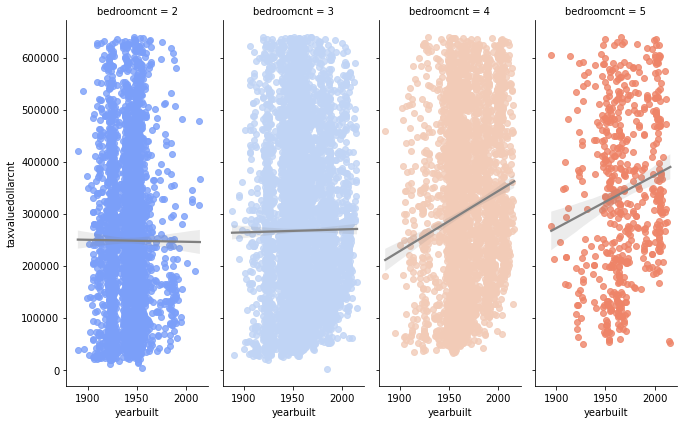

In [114]:
r = sns.lmplot(x="yearbuilt", y="taxvaluedollarcnt", hue="bedroomcnt", col="bedroomcnt",
               data=train_LA, line_kws={'color': 'grey'}, palette='coolwarm', height=6, aspect=.4, x_jitter=.1)

Key Takeaways: 
- 27% of LA county homes (4/5 bedroom) have a moderate positive linear relationship between the year a home is built and its actual property tax value.
- 73% of LA county homes (2/3 bedroom) have no significant relationship between the year a home is built and its actual property tax value.


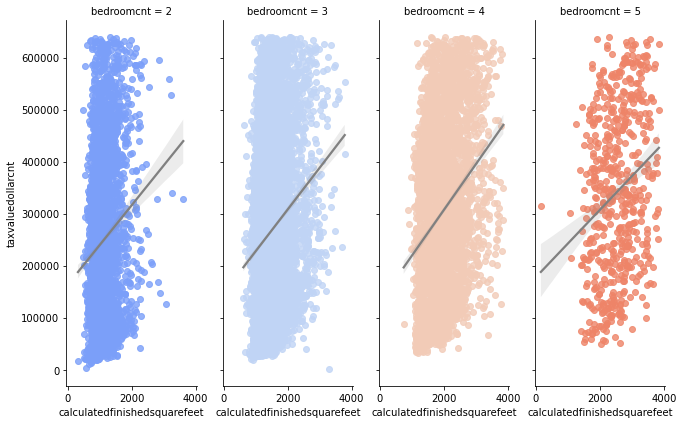

In [115]:
z = sns.lmplot(x="calculatedfinishedsquarefeet", y="taxvaluedollarcnt", hue="bedroomcnt", col="bedroomcnt",
               data=train_LA, line_kws={'color': 'grey'},palette='coolwarm', height=6, aspect=.4, x_jitter=.1)

Text(0.5, 1.0, 'How does square feet affect property tax value in LA County?')

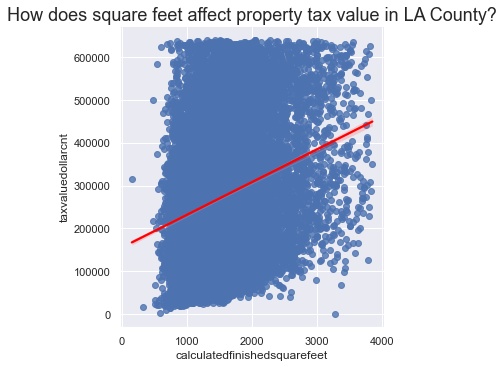

In [152]:
a = sns.lmplot(x="calculatedfinishedsquarefeet", y="taxvaluedollarcnt",
               data=train_LA, line_kws={'color': 'red'}, palette = 'coolwarm')
plt.title('How does square feet affect property tax value in LA County?', fontdict = {'fontsize' : 18})

### Irrespective of bedroom count or bathroom count, on average,  as square feet increases  property value increases